### Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import matplotlib

### Reading the csv file

In [2]:
df = pd.read_csv("InsuranceCharge.csv")
df

,age,sex,bmi,children,smoker,region,charges
0,19.0,1,27.900,0.0,0,0,16884.92400
1,18.0,0,33.770,1.0,1,3,1725.55230
2,NaN,0,NaN,3.0,1,3,4449.46200
3,33.0,0,22.705,0.0,1,1,21984.47061
4,32.0,0,28.880,0.0,1,1,3866.85520
...,...,...,...,...,...,...,...
1333,50.0,0,30.970,3.0,1,1,10600.54830
1334,18.0,1,31.920,0.0,1,2,2205.98080
1335,18.0,1,36.850,0.0,1,3,1629.83350
1336,21.0,1,25.800,NaN,1,0,2007.94500


### Display different features of dataframe

In [3]:
print("Total Features : ",df.shape[1])
print("Total Data     : ",df.shape[0])

Total Features :  7
Total Data     :  1338


In [4]:
print("Featues : ",df.columns.tolist())

Featues :  ['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']


In [5]:
df.isnull().sum()

age         134
sex           0
bmi          67
children    201
smoker        0
region        0
charges       0
dtype: int64

### Performing data imputation

In [6]:
df['age'].fillna(df['age'].mean(), inplace = True)
df['bmi'].fillna(df['bmi'].mean(), inplace = True)
df['children'].fillna(df['children'].median(), inplace = True)

In [7]:
df['age'] = df['age'].apply(lambda x: round(x, 0))
df['bmi'] = df['bmi'].apply(lambda x: round(x, 0))
df['age'] = df['age'].apply(lambda x: round(x, 0))
df

,age,sex,bmi,children,smoker,region,charges
0,19.0,1,28.0,0.0,0,0,16884.92400
1,18.0,0,34.0,1.0,1,3,1725.55230
2,39.0,0,31.0,3.0,1,3,4449.46200
3,33.0,0,23.0,0.0,1,1,21984.47061
4,32.0,0,29.0,0.0,1,1,3866.85520
...,...,...,...,...,...,...,...
1333,50.0,0,31.0,3.0,1,1,10600.54830
1334,18.0,1,32.0,0.0,1,2,2205.98080
1335,18.0,1,37.0,0.0,1,3,1629.83350
1336,21.0,1,26.0,1.0,1,0,2007.94500


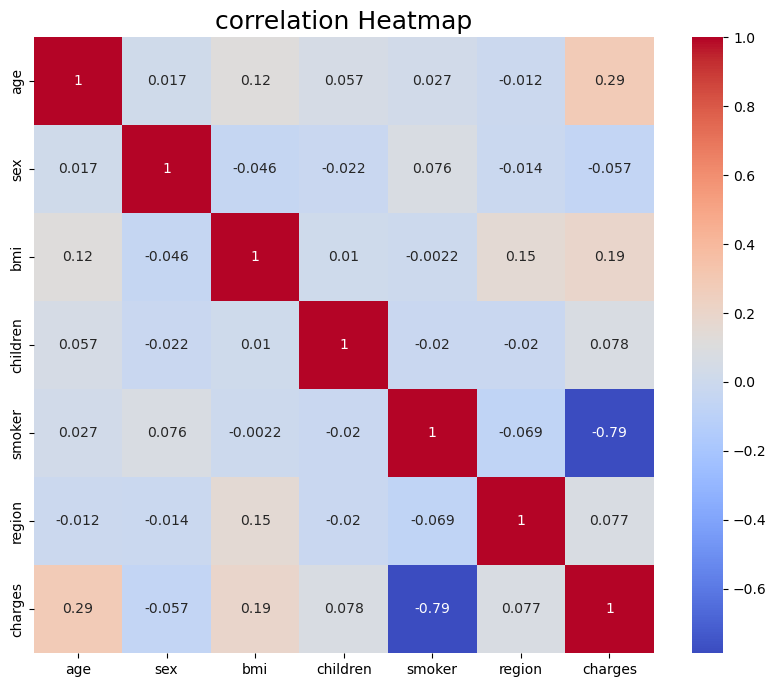

In [8]:
plt.figure(figsize=(10,8))
axis = sns.heatmap(df.corr(),cmap='coolwarm',cbar=True,annot=True)
axis.set_title('correlation Heatmap', size=18)
plt.show()

### Splitting the data into training and testing data

In [9]:
X = df.drop('charges',axis=1)
y = df['charges']

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=21)

### Creating and executing the multiple linear regression model

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [13]:
lr_regressor = LinearRegression()
lr_regressor.fit(X_train,y_train)
lr_y = lr_regressor.predict(X_test)

C:\Users\clivinjohn.geju\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='charges', ylabel='Density'>

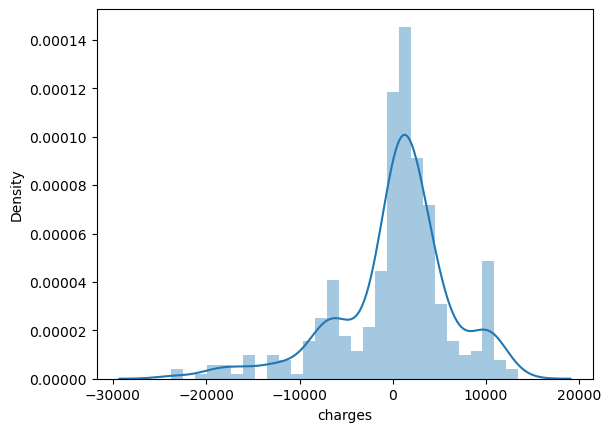

In [14]:
sns.distplot(lr_y-y_test)

In [15]:
print('Coefficient o R^2 <-- on train data : {}'.format(lr_regressor.score(X_train,y_train)))
print('Coefficient o R^2 <-- on test data : {}'.format(lr_regressor.score(X_test,y_test)))
print("Mean absolute Error : ",mean_absolute_error(lr_y,y_test))
print("Mean squared Error : ",mean_squared_error(lr_y,y_test))
print("Root Mean Squared Error : ",np.sqrt(mean_squared_error(lr_y,y_test)))

Coefficient o R^2 <-- on train data : 0.7460916554357143
Coefficient o R^2 <-- on test data : 0.7228387172504791
Mean absolute Error :  4357.601557667185
Mean squared Error :  37933285.298837304
Root Mean Squared Error :  6159.000348988244


In [16]:
import statsmodels.api as sm
x_train = sm.add_constant(X_train)
modell = sm.OLS(y_train, x_train)
resultt = modell.fit()

# Print summary of model 
print(resultt.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.746
Model:                            OLS   Adj. R-squared:                  0.744
Method:                 Least Squares   F-statistic:                     455.0
Date:                Fri, 14 Oct 2022   Prob (F-statistic):          1.80e-272
Time:                        14:18:30   Log-Likelihood:                -9498.7
No. Observations:                 936   AIC:                         1.901e+04
Df Residuals:                     929   BIC:                         1.905e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.161e+04   1292.996      8.977      0.0

### Testing model with user input data

ans = True<br>
while ans == True:<br>
    age = float(input("Enter age: "))<br>
    sex = int(input("Enter gender [Female - 1, Male - 0]: "))<br>
    bmi = float(input("Enter bmi: "))<br>
    children = float(input("Enter number of children: "))<br>
    smoker = int(input("Enter whether patient a smoker [Yes - 0, No - 1]: "))<br>
    region = int(input("Enter region [southwest - 0, souteast - 3, northwest - 1, northeast - 2]: "))<br>
    agef = round(age, 0)<br>
    bmif = round(bmi, 0)<br>
    temp = pd.df([agef, sex, bmif, children, smoker, region])<br>
    df.append(temp)
    predf = agef * resultt.params[1] - sex * resultt.params[2] + bmif * resultt.params[3] + children * resultt.params[4] 
    - smoker * resultt.params[5] + region * resultt.params[6] + resultt.params[0]
    print("The predicted cost for the patient is:", predf)<br>
    cont = input("Continue? [Yes - Y/y, No - N/n]: ")<br>
    if cont == "N" or cont == "n":
        ans = False

In [17]:
# age = float(input("Enter age: "))
# sex = int(input("Enter gender [Female - 1, Male - 0]: "))
# bmi = float(input("Enter bmi: "))
# children = float(input("Enter number of children: "))
# smoker = int(input("Enter whether patient a smoker [Yes - 0, No - 1]: "))
# region = int(input("Enter region [southwest - 0, souteast - 3, northwest - 1, northeast - 2]: "))

In [18]:
# agef = round(age, 0)
# bmif = round(bmi, 0)
# childrenf = round(children, 0)

In [19]:
# predf = agef * resultt.params[1] - sex * resultt.params[2] + bmif * resultt.params[3] + childrenf * resultt.params[4] - smoker * resultt.params[5] + region * resultt.params[6] + resultt.params[0]
# print("The predicted cost for the patient is:", predf)